# 03_04: Doing math with NumPy arrays

NumPy is very good at math. While interpreted languages such as Python have a reputation of being slow, we can do math very fast in Python as long as we write code that operates on entire arrays.

This is because the loops that are needed to perform math over the array are then implemented in compiled c within the NumPy Library. So how do we do math with arrays? 

In [22]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

Let's start by creating a one-dimensional vector of equally spaced real values between say, zero and five times pi.

In [23]:
x = np.linspace(0.0, 5.0*math.pi, 128) #EXTREMA ARE INCLUDED

In [24]:
x

array([ 0.        ,  0.12368475,  0.2473695 ,  0.37105425,  0.494739  ,
        0.61842375,  0.7421085 ,  0.86579325,  0.989478  ,  1.11316275,
        1.2368475 ,  1.36053225,  1.484217  ,  1.60790175,  1.7315865 ,
        1.85527125,  1.978956  ,  2.10264075,  2.2263255 ,  2.35001025,
        2.473695  ,  2.59737975,  2.7210645 ,  2.84474925,  2.968434  ,
        3.09211875,  3.2158035 ,  3.33948825,  3.463173  ,  3.58685775,
        3.7105425 ,  3.83422725,  3.957912  ,  4.08159675,  4.2052815 ,
        4.32896625,  4.45265101,  4.57633576,  4.70002051,  4.82370526,
        4.94739001,  5.07107476,  5.19475951,  5.31844426,  5.44212901,
        5.56581376,  5.68949851,  5.81318326,  5.93686801,  6.06055276,
        6.18423751,  6.30792226,  6.43160701,  6.55529176,  6.67897651,
        6.80266126,  6.92634601,  7.05003076,  7.17371551,  7.29740026,
        7.42108501,  7.54476976,  7.66845451,  7.79213926,  7.91582401,
        8.03950876,  8.16319351,  8.28687826,  8.41056301,  8.53

We would like to compute the sine of all of those values. The regular version of this function in the math library will not do.

In [25]:
math.sin(x)

TypeError: only length-1 arrays can be converted to Python scalars

Instead we use the NumPy function of the same name.

In [ ]:
sinx = np.sin(x)

In [ ]:
sinx

array([ 0.00000000e+00,  1.23369638e-01,  2.44854382e-01,  3.62598137e-01,
        4.74801964e-01,  5.79751564e-01,  6.75843473e-01,  7.61609559e-01,
        8.35739449e-01,  8.97100557e-01,  9.44755382e-01,  9.77975832e-01,
        9.96254351e-01,  9.99311673e-01,  9.87101086e-01,  9.59809149e-01,
        9.17852840e-01,  8.61873185e-01,  7.92725465e-01,  7.11466148e-01,
        6.19336749e-01,  5.17744860e-01,  4.08242645e-01,  2.92503125e-01,
        1.72294617e-01,  4.94537199e-02, -7.41427526e-02, -1.96606441e-01,
       -3.16066292e-01, -4.30697148e-01, -5.38747630e-01, -6.38566896e-01,
       -7.28629866e-01, -8.07560519e-01, -8.74152919e-01, -9.27389639e-01,
       -9.66457306e-01, -9.90759028e-01, -9.99923511e-01, -9.93810738e-01,
       -9.72514103e-01, -9.36358983e-01, -8.85897772e-01, -8.21901439e-01,
       -7.45347746e-01, -6.57406313e-01, -5.59420747e-01, -4.52888114e-01,
       -3.39436063e-01, -2.20797963e-01, -9.87864183e-02,  2.47344273e-02,
        1.47877370e-01,  

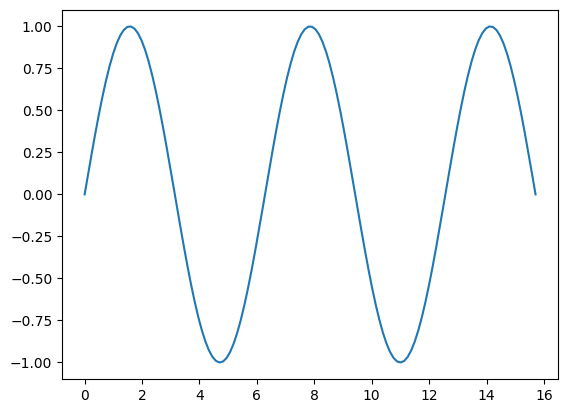

In [ ]:
pp.plot(x,sinx)

The result is another NumPy array with the same shape as X. Here's a plot. NumPy has a function for pretty much everything you can find in the standard math library. The Numpy functions are what is known as universal functions, and they operate element-wise across entire arrays. They include arithmetics, logical expressions, trgonometry, hyperbolic functions, exponentials and logarithms, checking for infinity and not a number, rounding, and so much more.

**NumPy Universal Functions (Selected)**

- Arithmetic: +,-,*,/,**,%,np.abs, np.sqrt

- Logical/bitwise: & (and), | (or), ^ (xor), ~ (not)

- Trigonometric: np.sin, np.cos, np.tan, np.arcsin, np.arccos, np.arctan. np.artan2(y,x)

- Hyperbolic: np.sinh, np.cosh, np.tanh, np.arcsing, np.arccosh, np.arctanh

- Exponential/logarithmix: np.exp, np.log, np.log10

- Miscellaneous: np.isinf, np.isnan, np.round, np.floor, np.ceil


We created a plot of a function by a giving two vectors to matplotlib so that it would use one for the x-axis and one or the y-axis. The Y range was set automatically.

By repeating the plot statement, we can show multiple functions together. Matplotlib will automatically cycle through colors so that we can distinguish the curves. So let's try our sine together with a cosine and a logarithm.

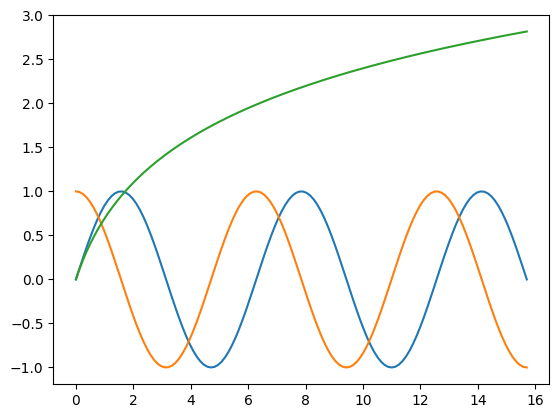

In [ ]:
pp.plot(x, sinx)
pp.plot(x, np.cos(x))
pp.plot(x, np.log(1.0 + x))

To see which is which we add labels and request a legend.

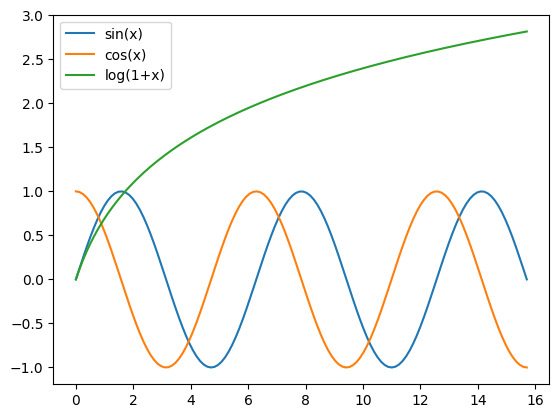

In [ ]:
pp.plot(x, sinx, label='sin(x)')
pp.plot(x, np.cos(x), label='cos(x)')
pp.plot(x, np.log(1+x), label='log(1+x)')

pp.legend()

There's many more options in matplotlib regarding style of the lines and the formatting of the plot, which we will see in the rest of this course and that you can look up in the docs online.

We can also perform operations that involve more than one array.

In [ ]:
cosx = np.cos(x)

Everything goes fine so long as we match array shapes.

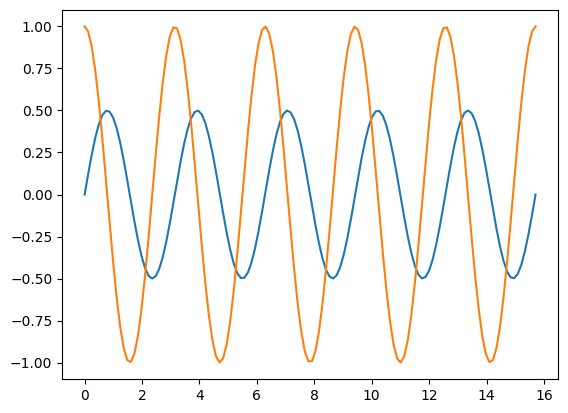

In [ ]:
y = sinx * cosx
z = cosx**2 - sinx**2 # ** is to the power of

pp.plot(x,y)
pp.plot(x,z)

By contrast, operations between arrays of different shapes will generally fail.

In [ ]:
x + y[16:32]

ValueError: operands could not be broadcast together with shapes (128,) (16,) 

This is because NumPy doesn't know what to do.

In [ ]:
w = sinx +1.5

There is one important exception, known as broadcasting. With broadcasting, NumPy tries to make sense of operations between arrays of different dimensions. The simplest case, which is rather intuitive, is adding a single number to an entire array, which adds it to every element. So we would say that the addition of the number is broadcast through the array

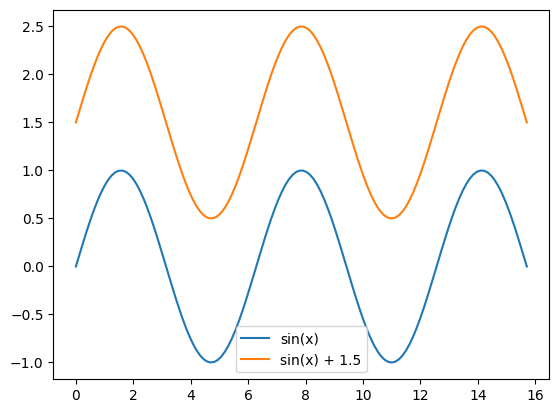

In [ ]:
pp.plot(x, sinx, label='sin(x)')
pp.plot(x,w, label='sin(x) + 1.5')
pp.legend()

To Make an example in two-dimensions, we'll use our friend Mona Lisa again. 

In [ ]:
monalisa_bw = np.loadtxt('monalisa.txt')

In [ ]:
monalisa_bw.shape

(200, 134)

The image is 200 rows by 134 columns. I can multiply every column by a different number by making a vector of length 134. In this case, NumPy matches the second dimension of the array with a single dimension of the vector, broadcasting the values along the rows.

In [ ]:
xgrad = np.linspace(0.0, 1.0, 134)

My vector is a gradient that modifies the luminosity of the columns across the image.

In [ ]:
monalisa_xgrad = monalisa_bw * xgrad

Let's see the images side by side. We use matplotlib's subplot to make a one by two arrangement.

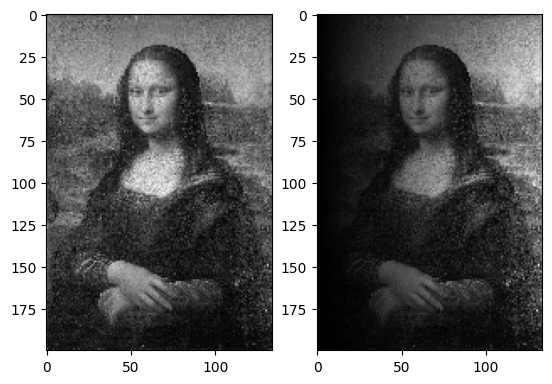

In [27]:
pp.subplot(1, 2, 1); pp.imshow(monalisa_bw, cmap='gray')
pp.subplot(1, 2, 2); pp.imshow(monalisa_xgrad, cmap='gray')

What about the other way around? 

In [28]:
ygrad = np.linspace(0.0, 1.0, 200)

If I make a vector of length 200, you'd think we could apply it on the left to multiply every row by a single value, but ...

In [29]:
monalisa_ygrad = ygrad * monalisa_bw

ValueError: operands could not be broadcast together with shapes (200,) (200,134) 

...that does not work. What happens with broadcasting is that NumPy matches array shapes starting from the last dimension on the right, expanding missing dimensions into size of one, and broadcasting along all dimensions of size one. So to match the rows of the image with those of the gradient, we need the ygrad to have shape 201, which we can do with the slicing syntax and NumPy.newaxis.

**NumPy Broadcasting**

- NumPy matchs dimension from the right

- NumPy implicitly adds dimensions on the left (with size 1) if needed

- NumPy then **broadcasts** along size 1 dimensions

- User can add dimensions explicitly with np.newaxis

In [31]:
ygrad_2d = ygrad[:, np.newaxis]

In [32]:
ygrad_2d.shape

(200, 1)

This turns our vector into a two-dimsional array. Now, NumPy can broadcast along the second dimension and apply the same multiplication along each row.

In [33]:
monalisa_ygrad = monalisa_bw * ygrad_2d

In [ ]:
pp.subplot

Since Version 3.5, Python includes a special matrix multiplication operator through @. The standard multiplication sign gives you the element-wise product.

In [34]:
np.array([0.0, 1.0, 2.0]) @ np.array([-1.0, -2.0, -3.0]) #same as np.dot()

np.float64(-8.0)

In [37]:
np. array([0.0, 1.0, 2.0]) * np.array([-1.0, -2.0, -3.0])

array([-0., -2., -6.])

In [38]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([10.0, 20.0, 30.0])
#shapes (2,3) and (3,) produces a result of size (2,1)

array([ 80., 260.])

In [41]:
#?? The @ symbol can also denote matrix by matrix multiplication
np.array([100.0, 200.0]) @ np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
# shapes (2,) and (2,3) ; since the (2,) is 1d, it makes it into a 1x2 matrix to make it's product make sense

array([ 600.,  900., 1200.])

In [40]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([[10.0, 20.0], [30.0, 40.0], [50.0, 60.0]])
# shapes (2,3) and (3,2)

array([[130., 160.],
       [400., 520.]])

**NumPy Features (Selected)**

- Reshaping and combining: np.reshape, np.flatten, np.transpose, np.concatenate, np. vstack, np.hstack

- Aggregation and statistics: np.sum, np.prod, np.mean, np.median, np.std, np.var, np.min, np.max, np.argmin, np.argmax, np.polyfit, np.polyval

- Linear algebra: np.inv, np.det, np.eig, np.svd, np.solve

- Sorting/searching/counting: np.sort, np.argsort, np.where, np.unique, np.bincount

- Fourier transform: np.fft.fft, npt.fft.ifft